In [13]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv


In [14]:
load_dotenv()

True

In [15]:
model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [16]:
# create a state

class BlogState(TypedDict):

    title: str
    outline: str
    content: str
    

In [17]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    

    # ask that que to the LLM
    outline = model.invoke(prompt).content

    # update the state

    state['outline'] = outline

    return state



In [18]:
def create_blog(state: BlogState) -> BlogState:

    # fetch title and outline
    title = state['title']
    outline = state['outline']

    # call llm gen outline
    prompt = f'Generate a detailed blog on the topic - {title} using the following \n {outline}'
    

    # ask that que to the LLM
    content = model.invoke(prompt).content

    # update the state

    state['content'] = content

    return state



In [19]:
# create our graph

graph = StateGraph(BlogState)

# add your nodes

graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

# add your edges 
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

# compile the graph
workflow = graph.compile()

In [21]:
# execute the graph
initial_state = {'title':'Artificial Intelligence'}

final_state = workflow.invoke(initial_state)

print(final_state['content'])



## Artificial Intelligence: A Comprehensive Overview

**I. Introduction: The AI Revolution is Here**

*   **A. Hook:**

    Imagine a world where diseases are diagnosed before symptoms appear, traffic flows seamlessly, and personalized education caters to every student's unique learning style. This isn't science fiction; it's a glimpse into the potential of Artificial Intelligence. In fact, AI is projected to contribute a staggering $15.7 trillion to the global economy by 2030, fundamentally reshaping industries and our daily lives. Have you ever wondered, will AI truly enhance humanity, or is there a risk of it one day replacing it?

*   **B. Defining Artificial Intelligence (AI):**

    At its core, Artificial Intelligence (AI) refers to the ability of a computer or machine to mimic human cognitive functions. It's about creating systems that can think, learn, problem-solve, and make decisions autonomously. Unlike simple automation, which follows pre-programmed instructions, AI system

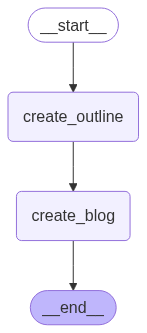

In [ ]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())
